# PCA

In [ ]:
# PCA 개요
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris=load_iris()

columns=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(iris.data,columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


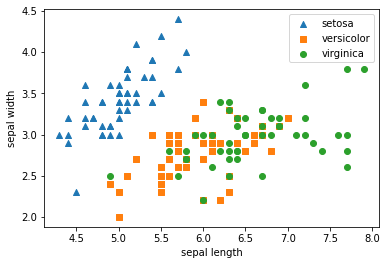

In [ ]:
markers=['^','s','o']

for i,marker in enumerate(markers):
  x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [ ]:
# 평균 0, 분산 1인 정규분포로 원본데이터 변환
from sklearn.preprocessing import StandardScaler

# 타겟값 제외하고 표준정규분포로 변환
iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:,:-1])
iris_scaled.shape

(150, 4)

In [ ]:
# 사이킷런 PCA 사용
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 3)


In [ ]:
pca_columns=['pca_component_1','pca_component_2','3']
irisDF_pca=pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,3,target
0,-2.264703,0.480027,-0.127706,0
1,-2.080961,-0.674134,-0.234609,0
2,-2.364229,-0.341908,0.044201,0


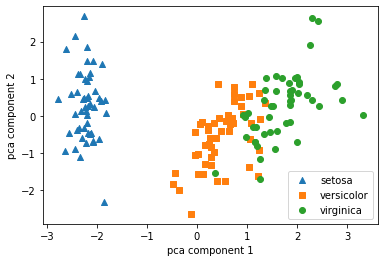

In [ ]:
# PCA로 차원축소된 피처로 데이터 산포도 시각화
markers=['^','s','o']
for i,marker in enumerate(markers):
  x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca component 1')
plt.ylabel('pca component 2')
plt.show()

In [ ]:
# 각 PCA Component별 변동성 비율
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922]


In [ ]:
# 원본 데이터 와 PCA 변환된 데이터 기반에서 예측 성능 비교
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf,iris.data,iris.target,scoring='accuracy',cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [ ]:
pca_X=irisDF_pca[['pca_component_1','pca_component_2','3']]
scores_pca=cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print(scores_pca)
print(np.mean(scores_pca))

[0.92 0.92 0.94]
0.9266666666666667


In [ ]:
# np.cov와 np.linalg.eig()의 성질 파악
import numpy as np
X=np.array([[2,2,7],[3,4,5],[2,3,4]])
X=X-np.mean(X)/np.std(X)
cov=np.cov(X.T)
eigenvalues,eigenvectors=np.linalg.eig(cov)
print(eigenvalues,'\n')
print(eigenvectors,'\n')
print(eigenvectors[:,2])

[ 2.92623975e+00 -1.32245560e-16  7.40426913e-01] 

[[-0.14904071 -0.78446454  0.60199855]
 [-0.48580909  0.58834841  0.64640211]
 [ 0.86126442  0.19611614  0.46878786]] 

[0.60199855 0.64640211 0.46878786]


In [ ]:
# python engineer 유튜브: PCA편
# PCA 클래스 직접 만들어보기!!
import numpy as np
class PCA:
  def __init__(self,n_components):
    self.n_components=n_components
    self.components=None
    self.mean=None
    self.std=None

  def fit(self,X):
    # Mean Centering 작업
    self.mean=np.mean(X,axis=0)
    self.std=np.std(X,axis=0)
    X=X-self.mean/self.std

    # 공분산 행렬 계산
    ## X.T를 사용하는 이유는 np.cov()는 각 행이름을 변수로 받아들이는데
    ## 보통 데이터의 변수는 열이름이기 때문에!
    ## X.T아니면 np.cov(X,rowvar=False)로 rowvar옵션을 거짓으로 설정해주기!!
    cov=np.cov(X.T)

    # 공분산 행렬에서 고유값,고유벡터 계산
    ## np.linalg.eig()의 고유벡터 리턴값은 각 열이 각 고유값에 해당하는 고유벡터임!!
    ## 즉, eigenvectors[:,i]가 i번째 고유벡터임!** 
    eigenvalues,eigenvectors=np.linalg.eig(cov)

    # 고유벡터 전치하고 고유값을 내림차순으로 정렬
    idxs=np.argsort(eigenvalues)[::-1]
    eigenvalues=eigenvalues[idxs]
    eigenvectors=eigenvectors[:,idxs]

    # 주성분 축의 개수 설정!
    self.components=eigenvectors[:,0:self.n_components]

  def transform(self,X):
    # mean centering 이후 고유벡터와 X를 선형변환!
    X=X-self.mean/self.std
    return np.dot(X,self.components)

(150, 4)
(150, 2)


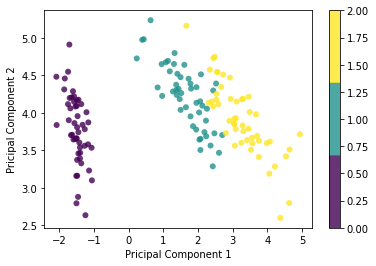

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

data=datasets.load_iris()
X=data.data
y=data.target

pca=PCA(2)
pca.fit(X)
X_projected=pca.transform(X)

print(X.shape)
print(X_projected.shape)

z1=X_projected[:,0]
z2=X_projected[:,1]

plt.scatter(z1,z2,c=y,edgecolor='none',alpha=0.8,
            cmap=plt.cm.get_cmap('viridis',3))

plt.xlabel('Pricipal Component 1')
plt.ylabel('Pricipal Component 2')
plt.colorbar()
plt.show()

## 신용카드 데이터 세트 PCA변환

In [1]:
# 데이터 로드 및 컬럼명 변환
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/credit_card.xls',sheet_name='Data',
                 header=1)
print(df.shape)
df.head(3)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [2]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},
          inplace=True)
y_target=df['default']
X_features=df.drop(['ID','default'],axis=1)

In [3]:
y_target.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [4]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

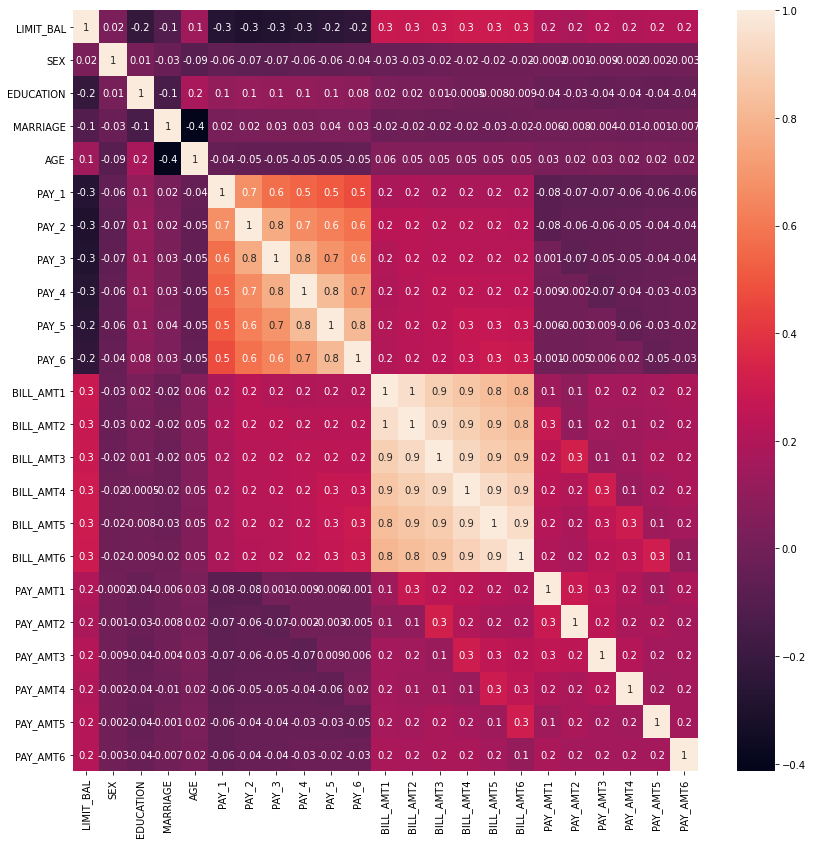

In [ ]:
# 피처 간 상관도 시각화
import seaborn as sns
import matplotlib.pyplot as plt

corr=X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,fmt='.1g')

In [5]:
# 상관도가 높은 피처들의 PCA 변환 후 변동성 확인
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

bill_cols=['BILL_AMT'+str(i) for i in range(1,7)]
pay_cols=['PAY_'+str(i) for i in range(1,7)]
cols=set(pay_cols)
cols.update(bill_cols)

scaler=StandardScaler()
df_cols_scaled=scaler.fit_transform(X_features[cols])
pca=PCA(n_components=5)
col_pca=pca.fit_transform(df_cols_scaled)

print(pca.explained_variance_ratio_)
bill_pay=pd.DataFrame(data=col_pca,columns=['1','2','3','4','5'])
bill_pay

[0.52922611 0.28199562 0.0593879  0.03453087 0.02405356]


,1,2,3,4,5
0,-1.630103,-0.532144,-3.154740,-0.335395,0.531123
1,-0.452585,-2.046905,0.871128,0.347304,0.743847
2,-0.641046,-0.899025,0.182847,-0.001305,-0.028092
3,0.011118,-0.461344,0.147701,0.050269,-0.174367
4,-0.946130,-0.300605,0.888318,0.041123,0.140147
...,...,...,...,...,...
29995,2.378411,1.158589,-0.256467,0.641893,-2.175799
29996,-1.797407,-0.010481,1.017355,-0.333853,-0.040310
29997,0.652373,-3.198417,-3.384774,-0.836413,1.039036
29998,-0.007297,-0.034953,-0.417300,-0.426551,-0.418422


In [6]:
bill_cols=['BILL_AMT'+str(i) for i in range(1,7)]

scaler=StandardScaler()
df_cols_scaled=scaler.fit_transform(X_features[bill_cols])
pca1=PCA(n_components=2)
col_pca1=pca1.fit_transform(df_cols_scaled)

bill=pd.DataFrame(data=col_pca1,columns=['bill_pca_1','bill_pca_2'])
print(pca1.explained_variance_ratio_)
bill

[0.90555253 0.0509867 ]


,bill_pca_1,bill_pca_2
0,-1.611148,0.012479
1,-1.547595,-0.062344
2,-1.035874,0.011256
3,-0.250712,0.174374
4,-0.968951,-0.213032
...,...,...
29995,2.610194,2.419078
29996,-1.521009,-0.066271
29997,-1.195519,-0.359507
29998,-0.008293,-0.049958


In [7]:
pay_cols=['PAY_'+str(i) for i in range(1,7)]

scaler=StandardScaler()
df_cols_scaled=scaler.fit_transform(X_features[pay_cols])
pca2=PCA(n_components=3)
col_pca2=pca2.fit_transform(df_cols_scaled)

pay=pd.DataFrame(data=col_pca2,columns=['pay_pca_1','pay_pca_2','pay_pca_3'])
print(pca2.explained_variance_ratio_)
pay

[0.71645838 0.11674569 0.06767707]


,pay_pca_1,pay_pca_2,pay_pca_3
0,-0.477471,-3.224644,-0.145043
1,1.461637,0.853881,0.360869
2,0.393314,0.175558,-0.004886
3,0.393314,0.175558,-0.004886
4,-0.273290,0.847431,0.045820
...,...,...,...
29995,0.393314,0.175558,-0.004886
29996,-0.983642,0.994121,-0.373963
29997,3.003066,-3.537165,-0.536190
29998,0.015424,-0.457090,-0.451258


In [8]:
# 차원축소 없이 교차검증 3세트를 통해 구한 정확도
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
 
rf=RandomForestClassifier(n_estimators=300,random_state=156)
scores=cross_val_score(rf,X_features,y_target,scoring='accuracy',cv=3)
 
print('cv=3의 개별 폴드 정확도:',scores)
print('평균 정확도:',np.mean(scores))

cv=3의 개별 폴드 정확도: [0.8083 0.8196 0.8232]
평균 정확도: 0.8170333333333333


In [10]:
# id와 default 피처 삭제 후, 11+(12개->5개)=>16개의 피처로 부분 차원축소하여 정확도 도출 
df0=df.copy()
pca_df0=pd.concat([df0,bill_pay],axis=1)
cols=list(cols)
pca_df0.drop(cols,axis=1,inplace=True)

X_features0=pca_df0.drop(['default','ID'],axis=1)
y_target=df['default']
print(X_features0.shape)
print(y_target.shape)

scaler=StandardScaler()
df_scaled0=scaler.fit_transform(X_features0)
scores=cross_val_score(rf,df_scaled0,y_target,scoring='accuracy',cv=5)

print('cv=3의 개별 폴드 정확도:',scores)
print('평균 정확도:',np.round(np.mean(scores),4))

(30000, 16)
(30000,)
cv=3의 개별 폴드 정확도: [0.8005     0.80716667 0.816      0.8265     0.81866667]
평균 정확도: 0.8138


In [11]:
# cv세트 3에서 5로 늘리니 예측 성능 확 좋아짐!
# id와 default 피처 삭제 후, 11+(6개->2개,6개->3개)=> 16개의 피처로 부분 차원축소하여 정확도 도출 
df0=df.copy()
pca_df1=pd.concat([df0,bill,pay],axis=1)
 
pca_df1.drop(bill_cols,axis=1,inplace=True)
pca_df1.drop(pay_cols,axis=1,inplace=True)

X_features1=pca_df1.drop(['default','ID'],axis=1)
y_target=df['default']
print(X_features1.shape) 

scores=cross_val_score(rf,X_features1,y_target,scoring='accuracy',cv=5)
 
print('cv=3의 개별 폴드 정확도:',scores)
print('평균 정확도:',np.round(np.mean(scores),4))

(30000, 16)
cv=3의 개별 폴드 정확도: [0.805      0.8095     0.8175     0.828      0.82066667]
평균 정확도: 0.8161


In [ ]:
# 23개->10개로 차원축소 후, 정확도 도출
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_scaled=scaler.fit_transform(X_features)

pca=PCA(n_components=10)
df_pca=pca.fit_transform(df_scaled)
scores_pca=cross_val_score(rf,df_pca,y_target,scoring='accuracy',cv=3)

print('cv=3의 개별 폴드 정확도:',scores_pca)
print('평균 정확도:',np.round(np.mean(scores_pca),4))

cv=3의 개별 폴드 정확도: [0.798  0.7997 0.806 ]
평균 정확도: 0.8012


In [ ]:
# 인프런 질문에 복사한 코드 (6개->2개로 차원축소해서 나머지 열과 concat하여 정확도 도출, 피처 총 19개)
## 부분적으로 차원축소를 해도 성과 나쁘지 않음! PAY관련 변수는 축소 안하고 BILL관련 피처만 부분축소하는 것이 성능 더 좋음. 참고!
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

df=pd.read_excel('/content/drive/MyDrive/credit_card.xls',sheet_name='Data',header=1)
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},inplace=True)

X_features=df.drop(['ID', 'default'],axis=1)
y_target=df['default']

bill_cols=['BILL_AMT'+str(i) for i in range(1,7)]

scaler=StandardScaler()
df_cols_scaled=scaler.fit_transform(X_features[bill_cols])
pca=PCA(n_components=2)
col_pca=pca.fit_transform(df_cols_scaled)

bill=pd.DataFrame(data=col_pca, columns=['bill_pca_1','bill_pca_2'])

df0=df.copy()
pca_df=pd.concat([df0,bill],axis=1)
pca_df.drop(bill_cols,axis=1,inplace=True)

X_features1=pca_df.drop('default',axis=1)
y_target=pca_df['default']

rf=RandomForestClassifier(n_estimators=300, random_state=156)
scores=cross_val_score(rf, X_features1, y_target,scoring='accuracy', cv=5)
print('평균 정확도:', np.round(np.mean(scores),4))

평균 정확도: 0.8179


# LDA

In [ ]:
# python engineer 유튜브: LDA편
import numpy as np
class LDA:
  def __init__(self,n_components):
    self.n_components=n_components
    self.linear_discriminants=None

  def fit(self,X,y):
    n_features=X.shape[1]
    class_labels=np.unique(y)

    # S_W, S_B
    mean_overall=np.mean(X,axis=0)
    S_W=np.zeros((n_features,n_features))
    S_B=np.zeros((n_features,n_features))
    for c in class_labels:
      X_c=X[y==c]
      mean_c=np.mean(X_c,axis=0)
      # 클래스 내부 분산 구하기
      # (4,n_c) * (n_c,4) = (4,4)
      S_W+=(X_c-mean_c).T.dot(X_c-mean_c)

      # 클래스 내부 분산 구하기
      n_c=X_c.shape[0]
      # (4,1) * (4,1).T = (4,4)
      mean_diff=(mean_c-mean_overall).reshape(n_features,1)
      S_B+=n_c*(mean_diff).dot(mean_diff.T)
    
    A=np.linalg.inv(S_W).dot(S_B)
    eigenvalues,eigenvectors=np.linalg.eig(A)
    
    idxs=np.argsort(abs(eigenvalues))[::-1]
    eigenvalues=eigenvalues[idxs]
    eigenvectors=eigenvectors[:,idxs]
    self.linear_discriminants=eigenvectors[:,0:self.n_components]
  
  def transform(self,X):
    return np.dot(X,self.linear_discriminants)

(150, 4)
(150, 2)


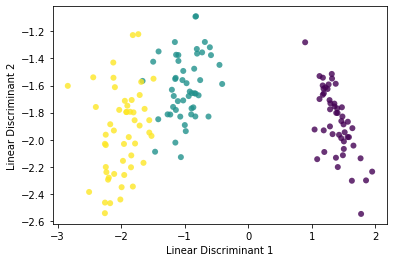

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

data=datasets.load_iris()
X=data.data
y=data.target

lda=LDA(2)
lda.fit(X,y)
X_projected=lda.transform(X)

print(X.shape)
print(X_projected.shape)

z1=X_projected[:,0]
z2=X_projected[:,1]

plt.scatter(z1,z2,c=y,edgecolor='none',alpha=0.8,
              label=iris.target_names[i])

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.show()

In [ ]:
# 사이킷런의 LDA 사용해보기
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris=load_iris()
iris_scaled=StandardScaler().fit_transform(iris.data)

lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled,iris.target)
iris_lda=lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


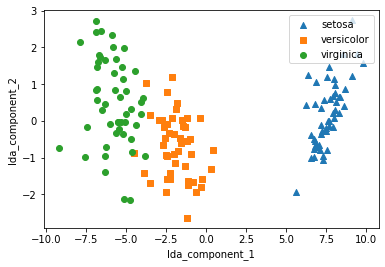

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda=pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

markers=['^','s','o']

for i,marker in enumerate(markers):
  x_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

# SVD

In [ ]:
import numpy as np
from numpy.linalg import svd

# 4x4 random matrix 생성
np.random.seed(121)
a=np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [ ]:
# SVD 행렬 분해
U,Sigma,Vt=svd(a)
print(U.shape,Sigma.shape,Vt.shape,'\n')
print('U matrix:\n',np.round(U,3),'\n')
print('Sigma Value:\n',np.round(Sigma,3),'\n')
print('V transpose matrix:\n',np.round(Vt,3))

(4, 4) (4,) (4, 4) 

U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]] 

Sigma Value:
 [3.423 2.023 0.463 0.079] 

V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [ ]:
# 분해된 행렬 원행렬로 원복
## Sigma가 (4,)인 1차원 행렬이기에 (4,4)인 *대각행렬*로 변환 후, 원복하기!
Sigma_mat=np.diag(Sigma)
a_=np.dot(np.dot(U,Sigma_mat),Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [ ]:
# 데이터 의존도가 높은 원본 데이터 행렬 생성
a[2]=a[0]+a[1]
a[3]=a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [ ]:
# 데이터 의존도가 높은 행렬은 시그마 행렬에서 0값이 생김
## 선형 독립인 행 벡터의 개수가 2개라는 의미!
u,sigma,vt=svd(a)
print(u.shape,sigma.shape,vt.shape)
print('sigma value:\n',np.round(sigma,3))

(4, 4) (4,) (4, 4)
sigma value:
 [2.663 0.807 0.    0.   ]


In [ ]:
# 0제외하고 복원해보기
u_=u[:,:2]
sigma_=np.diag(sigma[:2])
vt_=vt[:2]
print(u_.shape,sigma_.shape,vt_.shape)
a_=np.dot(np.dot(u_,sigma_),vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [ ]:
# Truncated SVD를 이용한 행렬 분해
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix=np.random.random((6,6))
print('원본 행렬:\n',matrix)
u,sigma,vt=svd(matrix,full_matrices=False)
print('\n분해 행렬 차원:',u.shape,sigma.shape,vt.shape)
print('\nSigma값 행렬:',sigma)

# Truncated SVD로 sigma행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components=5
u_tr,sigma_tr,vt_tr=svds(matrix,k=num_components)
print('\nTruncated SVD sigma값 행렬:',sigma_tr)
matrix_tr=np.dot(np.dot(u_tr,np.diag(sigma_tr)),vt_tr)

print('\nTruncated SVD 분해 후 복원 행렬:\n',matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD sigma값 행렬: [0.35834824 0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD 분해 후 복원 행렬:
 [[0.11368271 0.19721195 0.23106956 0.15961551 0.82758207 0.41695496]
 [0.55500167 0.75007112 0.24913473 0.96608621 0.95355502 0.48681791]
 [0.01789183 0.85994318 0.40526464 0.62115143 0.29581906 0.92803075]
 [0.40782587 0.55456069 0.24397702 0.23294659 0.035838   0.58947208]
 [0.82711496 0.78558742 0.94865955 0.7293489  0.67564311 0.73695659]
 [0.5136488

Text(0, 0.5, 'TruncatedSVD Component 2')

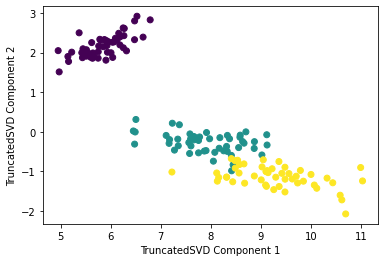

In [ ]:
# 사이킷런 TruncatedSVD 클래스를 이용한 변환
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris=load_iris()
iris_ftrs=iris.data
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd=tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

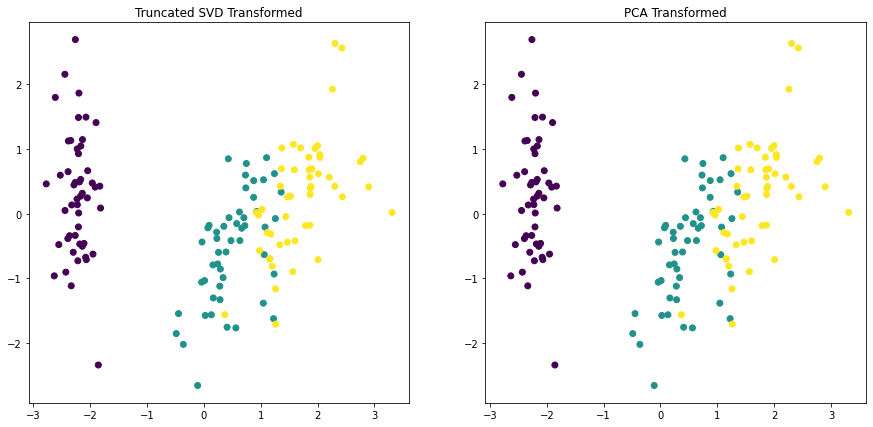

In [ ]:
# Truncated SVD 와 PCA 비교 (스케일링 이후 거의 동일해짐)
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler=StandardScaler()
iris_scaled=scaler.fit_transform(iris_ftrs)

# 스케일링 기반 TruncatedSVD 변환
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd=tsvd.transform(iris_scaled)

# 스케일링 기반 PCA 변환
pca=PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)

# TruncatedSVD와 PCA변환
fig,(ax1,ax2)=plt.subplots(figsize=(15,7),ncols=2)
ax1.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
ax2.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

# NMF

Text(0, 0.5, 'NMF Component 2')

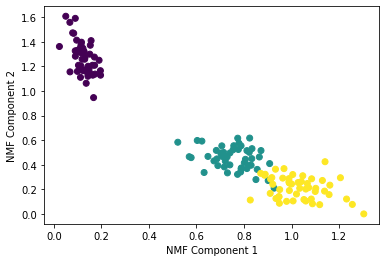

In [ ]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris=load_iris()
iris_ftrs=iris.data
nmf=NMF(n_components=2)

nmf.fit(iris_ftrs)
iris_nmf=nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:,0],y=iris_nmf[:,1],c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')